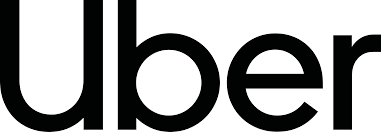

# `                         AN UBER DRIVER PROJECT                                                       `

## `A. INTRODUCTION:`
**Brief overview of the project:** 

The project involves analyzing a CSV file containing data on multiple trips taken by Uber drivers. The file includes columns such as 'START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*', and 'PURPOSE*'.

**Objectives and Goals:**

The primary goal of the project is to extract valuable insights and identify patterns or trends within the dataset that can provide meaningful information.

**Importance of Data Visualization and Data Mining:**

Data visualization plays a crucial role in comprehending various aspects of the trips, including starting and ending times, locations, and distances traveled. On the other hand, data mining techniques are essential for uncovering hidden patterns and trends that may not be immediately apparent from the raw data.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

## `B. METHODOLOGY:`

**Data Preprocessing:**

- Cleaning and transforming the data to ensure accuracy and consistency.
- Handling missing values by filling or imputing them appropriately.
- Converting data types as needed for analysis.
- Renaming columns for better clarity and understanding.

**Treatment of Outliers:**

- Identifying and addressing outliers in the dataset to prevent skewing of results.

**Feature Extraction:**

- Extracting relevant information such as month, year, and hour from date columns.
- Calculating the duration of trips by subtracting start time from stop time.
- Creating a column to indicate if a trip starts and ends at the same location.

**Data Analysis Techniques and Tools:**

- Utilizing the functionalities of the Matplotlib library to provide detailed visualizations for the project.
- Leveraging the Seaborn library to present aesthetically pleasing and informative graphs and plots.

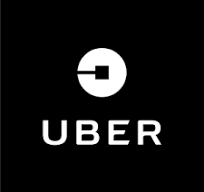

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('uberdrive.csv')

In [3]:
df.shape

(1155, 7)

In [4]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
(df.isna().sum()/df.shape[0])*100

START_DATE*     0.000000
END_DATE*       0.000000
CATEGORY*       0.000000
START*          0.000000
STOP*           0.000000
MILES*          0.000000
PURPOSE*       43.463203
dtype: float64

**_OBSERVATIONS:_**
- Purpose columns has 43.46% missing values, suggesting that nearly half of the rows in this column do not have data.

In [9]:
df.nunique()

START_DATE*    1154
END_DATE*      1154
CATEGORY*         2
START*          176
STOP*           187
MILES*          256
PURPOSE*         10
dtype: int64

In [10]:
for i in df.columns:
    print(df[i],':',df[i].value_counts())
    print("--"*50)

0       01-01-2016 21:11
1       01-02-2016 01:25
2       01-02-2016 20:25
3       01-05-2016 17:31
4       01-06-2016 14:42
              ...       
1150     12/31/2016 1:07
1151    12/31/2016 13:24
1152    12/31/2016 15:03
1153    12/31/2016 21:32
1154    12/31/2016 22:08
Name: START_DATE*, Length: 1155, dtype: object : 6/28/2016 23:34     2
01-01-2016 21:11    1
9/27/2016 21:01     1
9/27/2016 13:21     1
9/27/2016 8:33      1
                   ..
5/27/2016 20:47     1
5/27/2016 20:26     1
5/23/2016 21:09     1
5/23/2016 20:19     1
12/31/2016 22:08    1
Name: START_DATE*, Length: 1154, dtype: int64
----------------------------------------------------------------------------------------------------
0       01-01-2016 21:17
1       01-02-2016 01:37
2       01-02-2016 20:38
3       01-05-2016 17:45
4       01-06-2016 15:49
              ...       
1150     12/31/2016 1:14
1151    12/31/2016 13:42
1152    12/31/2016 15:38
1153    12/31/2016 21:50
1154    12/31/2016 23:51
Name: END_DA

In [11]:
df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


### **_`OBSERVATIONS:`_**

- Distribution of Distances: The data shows a wide range of distances covered by trips, ranging from very short distances (minimum of 0.5 miles) to longer journeys (maximum of 310.3 miles).

- Average Distance: The average distance covered by trips is approximately 10.57 miles, indicating that, on average, trips tend to be of moderate length.

- Variability: The standard deviation of approximately 21.58 suggests a considerable variability in trip distances around the mean. This variability could indicate diverse trip lengths or outliers in the dataset.

- Quartiles: The quartile values (25%, 50%, 75%) provide insights into the distribution of trip lengths. For example, 25% of trips have a distance of 2.9 miles or less (25th percentile), while 75% have a distance of 10.4 miles or less (75th percentile).

In [12]:
df.describe(include='object')

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,PURPOSE*
count,1155,1155,1155,1155,1155,653
unique,1154,1154,2,176,187,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,Meeting
freq,2,2,1078,201,203,187


In [13]:
df.duplicated().sum()

1

# `DATA PREPROCESSING or DATA TREATMENT                                                  `

In [14]:
# Dropping duplicated rows based on all columns
df = df.drop_duplicates()

In [15]:
# converting STARTDATE and ENDDATE into datetime datetype to extract time and date 
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [16]:
# renaming the columns for the ease of use
df = df.rename(columns=lambda x: x.replace('*', '').lower())

In [17]:
df.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

In [18]:
# treatment of null values in PURPOSE column as it carried  about 43% of NaN values
# filling the NaN values with Unknown variable to avoid data loss
df['purpose'].fillna("Unknown",inplace=True)

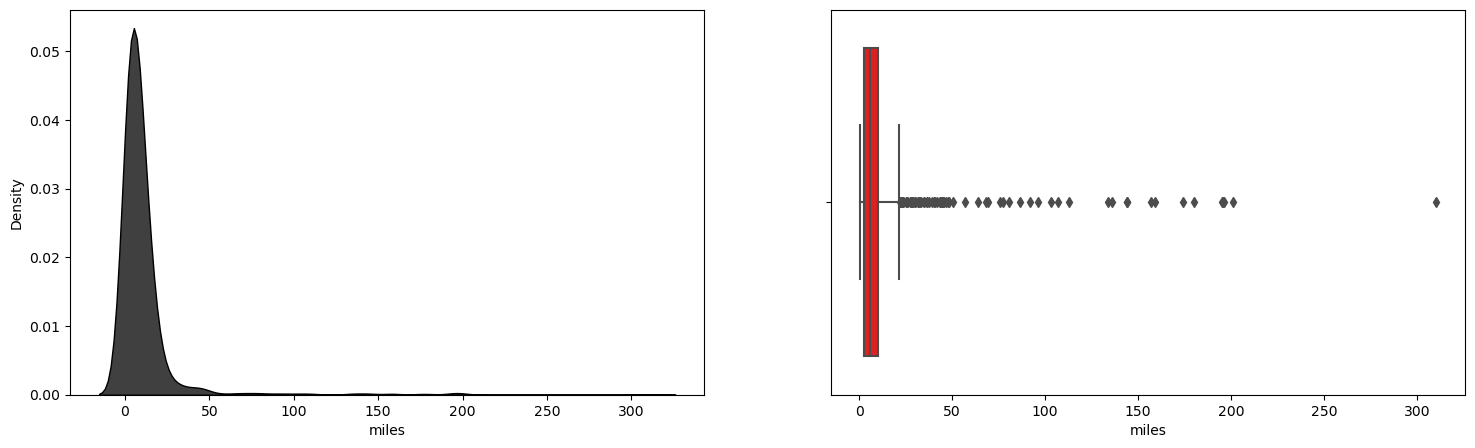

In [19]:
# treatment of outlietrs in the miles column
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df.miles,color='black',multiple='stack')
plt.subplot(1,2,2)
sns.boxplot(x=df.miles,color='red')
plt.show()

**Filtering the data based on percentiles is a common and valid approach, especially when you want to focus on a certain range of values or remove outliers from your dataset. In your case, if you filtered the 'miles' column to keep only values up to the 75th percentile, you effectively removed the top 25% of the data points based on their distance values.**

**This approach can be useful for various purposes, such as:**

- Analyzing the central tendency and dispersion of your dataset without extreme values affecting the results.
- Creating more robust models or visualizations by focusing on the majority of the data.
- Identifying and handling outliers that might skew your analysis or results.

In [20]:
percentile_90 = df['miles'].quantile(0.90)

# Filter the data to keep only values up to the 90th percentile
df = df[df['miles'] <= percentile_90]

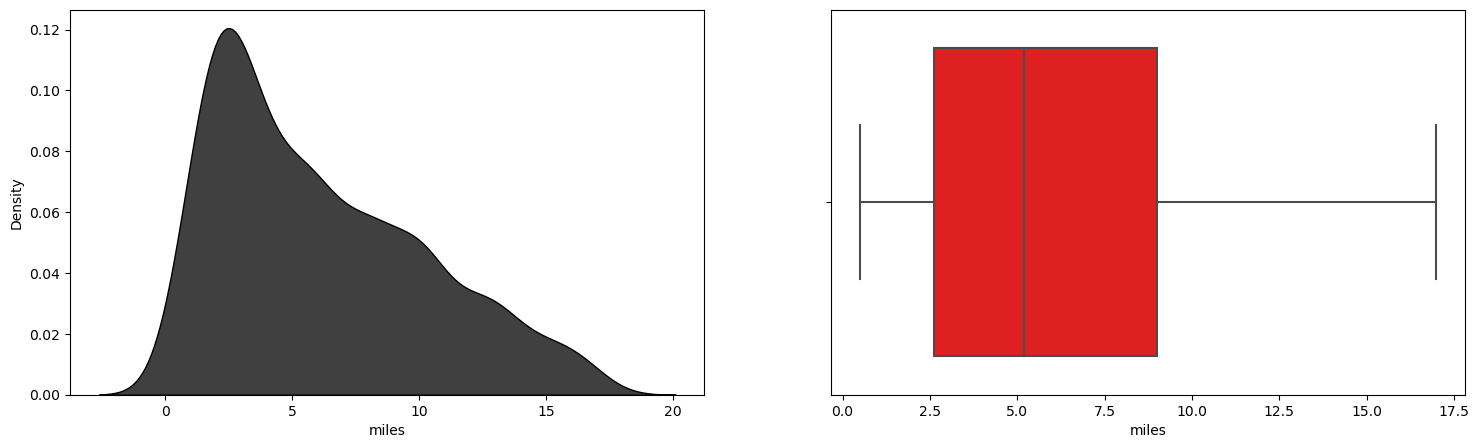

In [21]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df.miles,color='black',multiple='stack')
plt.subplot(1,2,2)
sns.boxplot(x=df.miles,color='red')
plt.show()

In [22]:
df.describe()

,miles
count,1038.000000
mean,6.147592
std,4.148222
min,0.500000
25%,2.625000
50%,5.200000
75%,9.000000
max,17.000000


### **_`OBSERVATIONS:`_**

**A. Miles:**

- Average Trip Distance: The average distance covered per trip is approximately 6.11 miles. This indicates that, on average, trips are of moderate length.
- Variability: The standard deviation of 4.13 suggests that trip distances vary considerably around the mean. This variability could be due to different trip purposes or routes taken.
- Range of Distances: The range of trip distances is from 0.5 miles to 17 miles. This wide range implies that there are both short-distance and long-distance trips in the dataset.
- Distribution: The quartile values show that 50% of trips have a distance of 5.2 miles or less, while 75% have a distance of 8.8 miles or less. This distribution indicates that a significant portion of trips are relatively short in distance.

**B. Insights on Duration Minutes:**

- Average Trip Duration: The average duration of trips is approximately 18 minutes. This suggests that, on average, trips last for a moderate duration.
- Variability: The standard deviation of 13.15 indicates variability in trip durations around the mean. This variability could be influenced by factors such as traffic conditions or trip purposes.
- Range of Durations: Trip durations range from 2 minutes to 154 minutes. This wide range reflects the diversity in trip durations, with some trips being very short and others much longer.
- Distribution: The quartile values reveal that 50% of trips have a duration of 15 minutes or less, while 75% have a duration of 23 minutes or less. This distribution shows that a significant proportion of trips are relatively short in duration.

# `FEATURE ENGINEERING`

In [23]:
# extracting time from datetime format column for further analysis
df['start_time'] = df['start_date'].dt.time
df['end_time'] = df['end_date'].dt.time

In [24]:
df['month'] = df['start_date'].dt.month
df['year'] = df['start_date'].dt.year
df['hour'] = df['start_date'].dt.hour

In [25]:
# Convert time strings to datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S').dt.time
df['end_time'] = pd.to_datetime(df['end_time'], format='%H:%M:%S').dt.time

In [26]:
def calculate_duration_minutes(start, end):
    start_minutes = start.hour * 60 + start.minute
    end_minutes = end.hour * 60 + end.minute
    duration_minutes = end_minutes - start_minutes
    return duration_minutes

In [27]:
# Calculate duration in minutes and store in a new column
df['duration_minutes'] = df.apply(lambda row: calculate_duration_minutes(row['start_time'], row['end_time']), axis=1)

In [28]:
# for some reason, we are getting duration in minus
# removing them as they will affect the analysis
df = df[df['duration_minutes'] > 1]

In [29]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,start_time,end_time,month,year,hour,duration_minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,21:17:00,1,2016,21,6
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,01:25:00,01:37:00,1,2016,1,12
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,20:38:00,1,2016,20,13
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31:00,17:45:00,1,2016,17,14
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17:15:00,17:19:00,1,2016,17,4


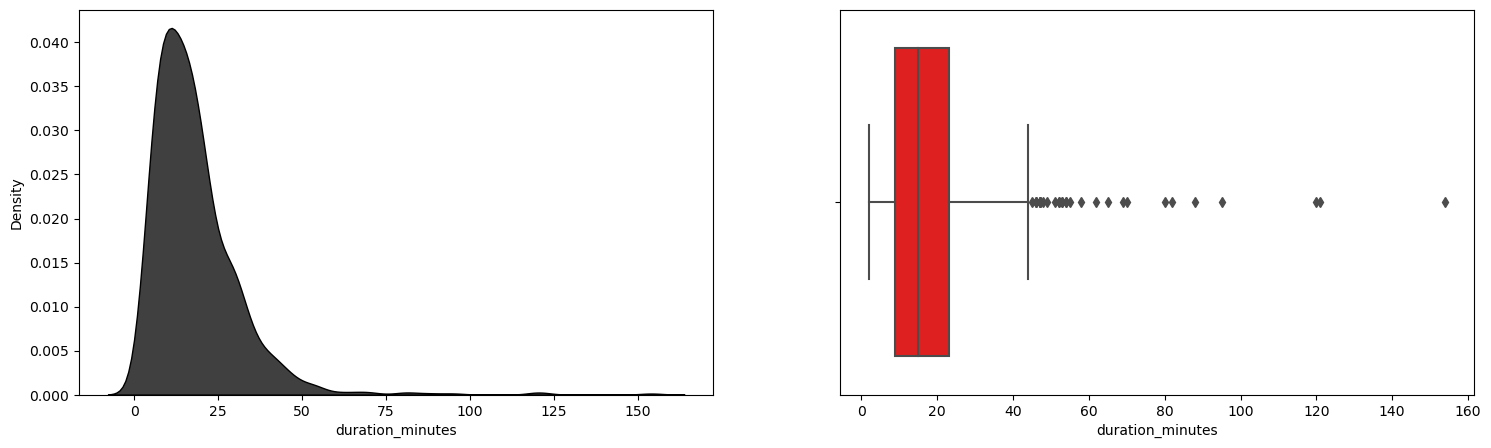

In [30]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df.duration_minutes,color='black',multiple='stack')
plt.subplot(1,2,2)
sns.boxplot(x=df.duration_minutes,color='red')
plt.show()

In [31]:
# preparing a new column that shows if the tripn was one way or not
def round(x):
    if x['start'] == x['stop']:
        return 'Yes'
    else:
        return 'No'
df['round_trip'] = df.apply(round, axis = 1)
df.head()

,start_date,end_date,category,start,stop,miles,purpose,start_time,end_time,month,year,hour,duration_minutes,round_trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,21:17:00,1,2016,21,6,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,01:25:00,01:37:00,1,2016,1,12,Yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,20:38:00,1,2016,20,13,Yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31:00,17:45:00,1,2016,17,14,Yes
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17:15:00,17:19:00,1,2016,17,4,Yes


# `DATA VISUALIZATION`

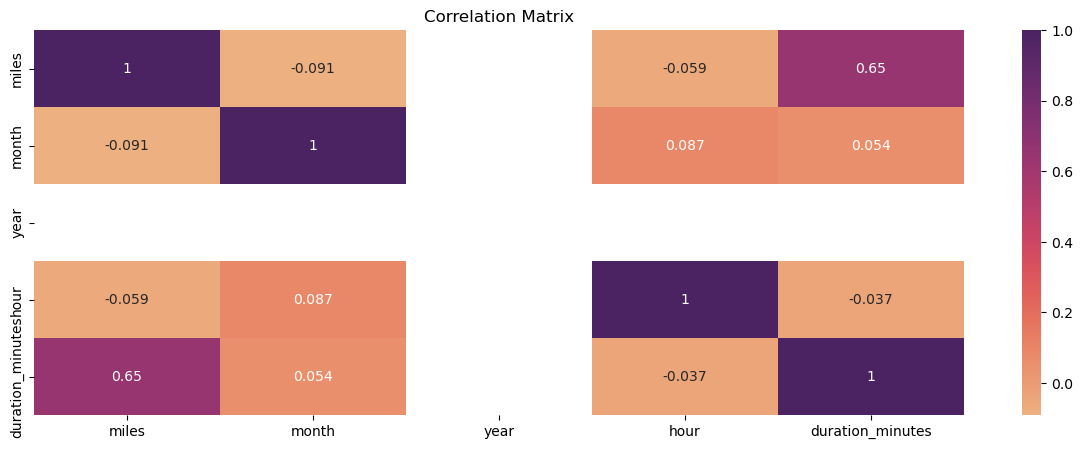

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='flare')
plt.title("Correlation Matrix")
plt.show()

### **_`OBSERVATIONS:`_**

**A. Miles and Duration Minutes:**

- There is a moderate positive correlation (0.65) between the distance covered in miles and the duration of trips in minutes. This suggests that longer trips tend to take more time, which is a logical relationship.

**B.Miles and Month:**

- There is a weak negative correlation (-0.09) between trip distance in miles and the month in which the trip occurs. This implies that there is no significant relationship between the distance of trips and the month of the year.

**C. Miles and Hour:**

- There is a weak negative correlation (-0.06) between trip distance in miles and the hour of the day when the trip starts. This suggests that there is no strong relationship between trip distance and the time of day.

**D. Duration Minutes and Month:**

- There is a weak positive correlation (0.05) between trip duration in minutes and the month of the year. This implies that there is no significant relationship between trip duration and the month in which the trip occurs.

**E. Duration Minutes and Hour:**

- There is a weak negative correlation (-0.04) between trip duration in minutes and the hour of the day when the trip starts. This suggests that there is no strong relationship between trip duration and the time of day.

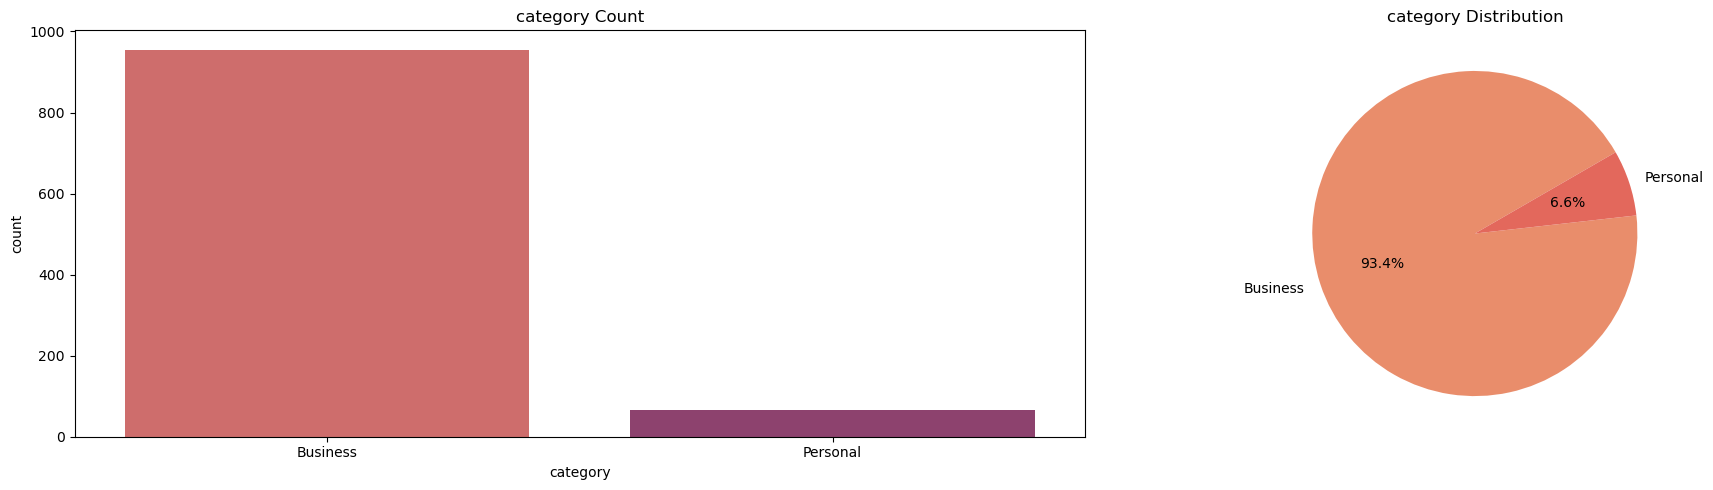

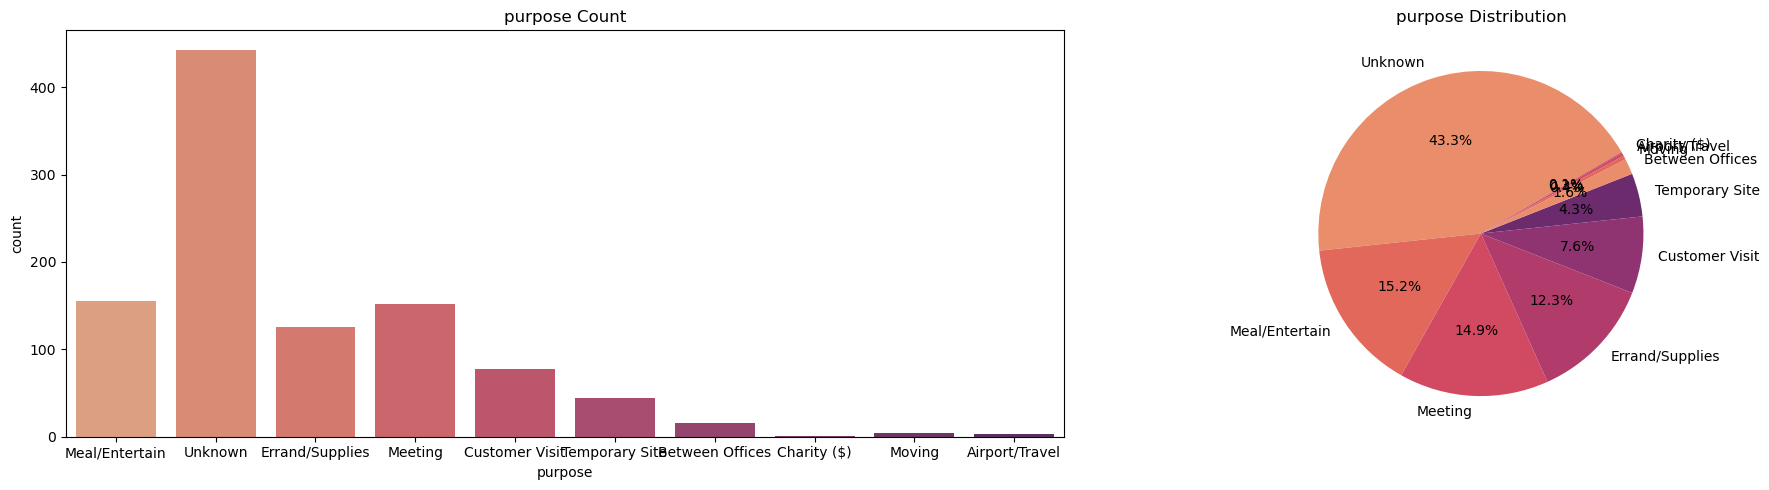

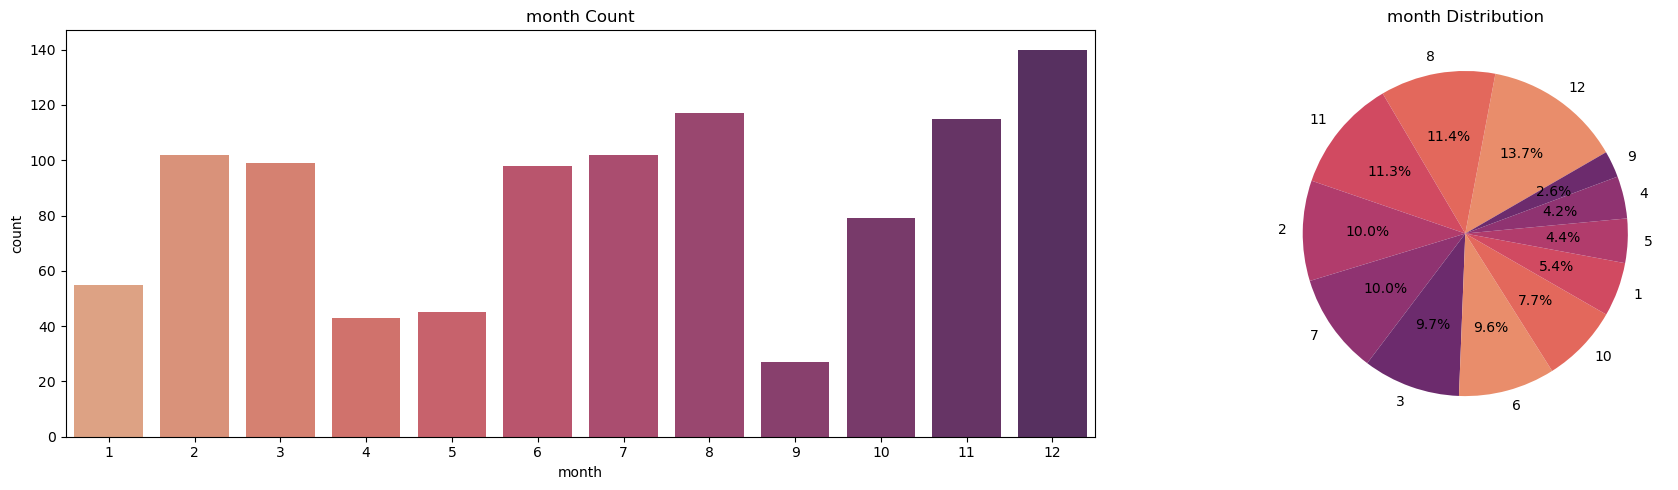

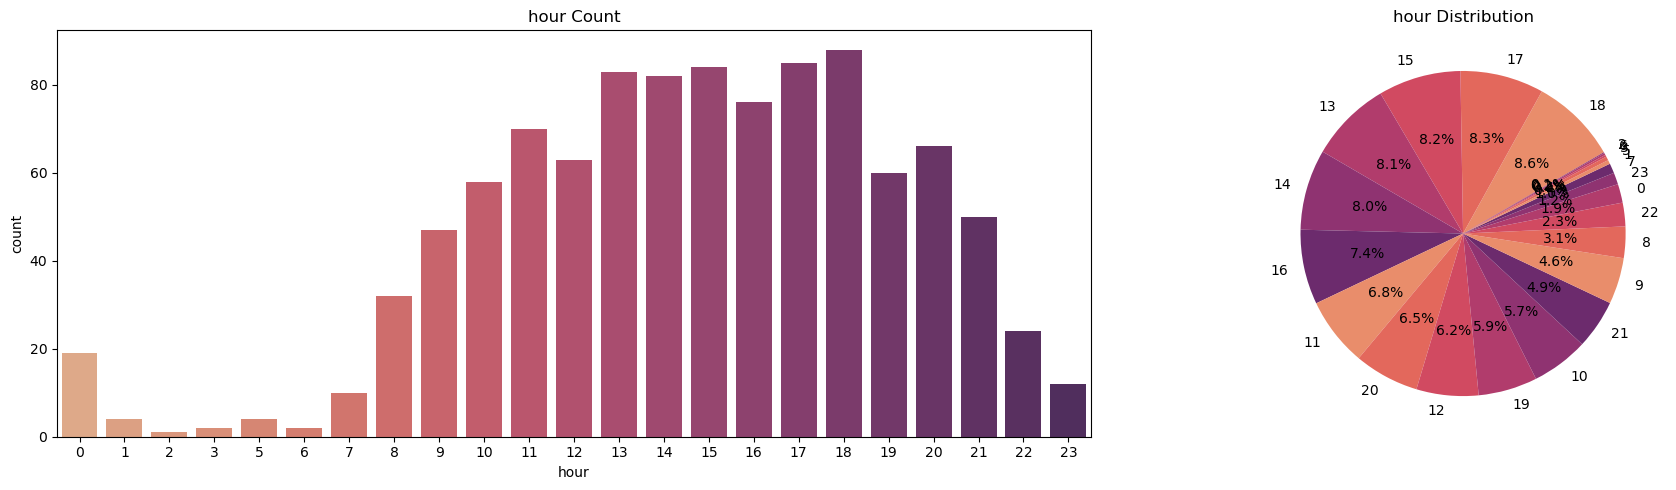

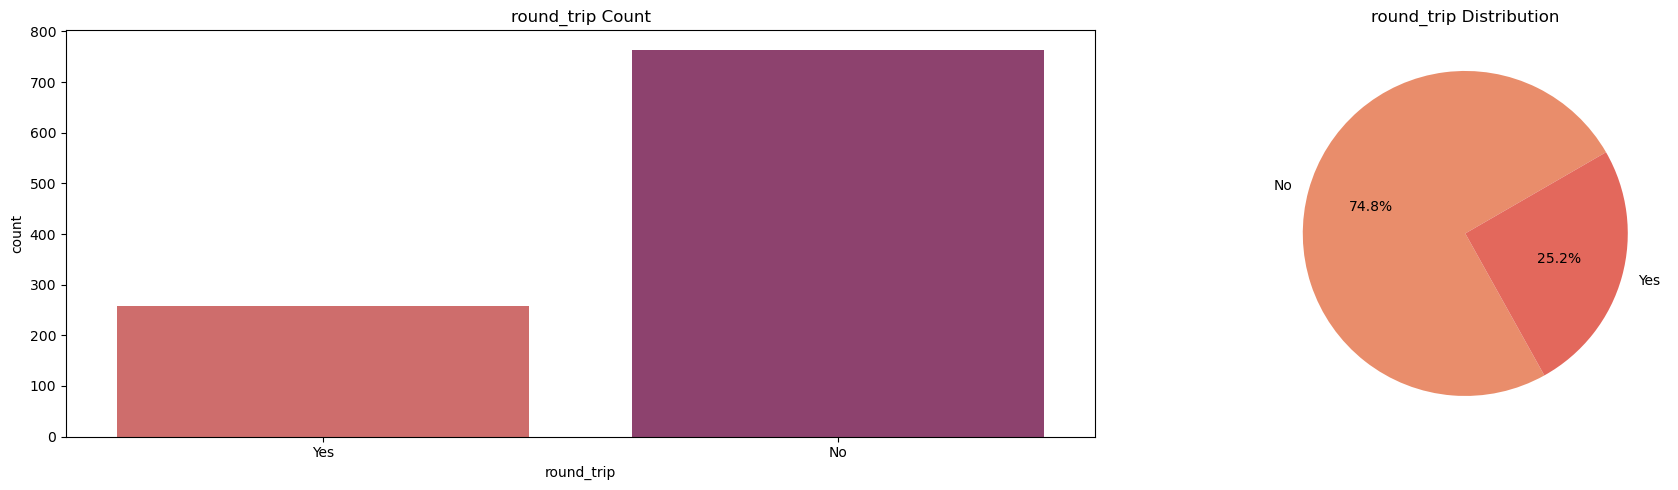

In [33]:
cols = ['category','purpose','month','hour','round_trip']

# Iterate through each column
for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    # Countplot on the left side
    sns.countplot(x=col, data=df, ax=axes[0], palette='flare')
    axes[0].set_title(f'{col} Count')

    # Pie plot on the right side
    col_counts = df[col].value_counts()
    axes[1].pie(col_counts, labels=col_counts.index, autopct='%1.1f%%', startangle=30, colors=sns.color_palette('flare'))
    axes[1].set_title(f'{col} Distribution')

    # Adjust layout
    plt.tight_layout()
    plt.show()

### **_`OBSERVATIONS / INSIGHTS`_**

**A. Category Distribution:**

- 93.5% of trips are categorized as Business trips, while 6.5% are Personal trips. This indicates that the majority of trips in the dataset are for business purposes.

**B. Purpose Distribution:** 

- 15.2% of trips are for Meal/Entertainment purposes, making it one of the top purposes for trips.
- Meetings account for 15% of trips, indicating that business-related activities are significant reasons for travel.
- Errands make up 12.3% of trips, suggesting that personal tasks and activities are also common reasons for travel.

**C. Month Distribution:**

- December has the highest percentage of total rides booked, with 13.75% of trips occurring in this month. This could be due to year-end activities, holidays, or seasonal factors.
- August follows closely with 11.45% of trips, indicating a busy period during the summer months.
- November contributes 11.2% of trips, suggesting a consistent level of travel throughout the year.
- September and April have the least number of total trips, each accounting for 2.6% and 4.2% of the total, respectively.
- July and February both contribute 10% of trips, showing moderate travel activity during these months.

**D. Type of Trips:**

- One-way trips are the most common, making up 74.8% of total trips, indicating that most trips do not involve return journeys.
- Other trips, which could include round trips or specific types of travel arrangements, account for 25.2% of total trips.

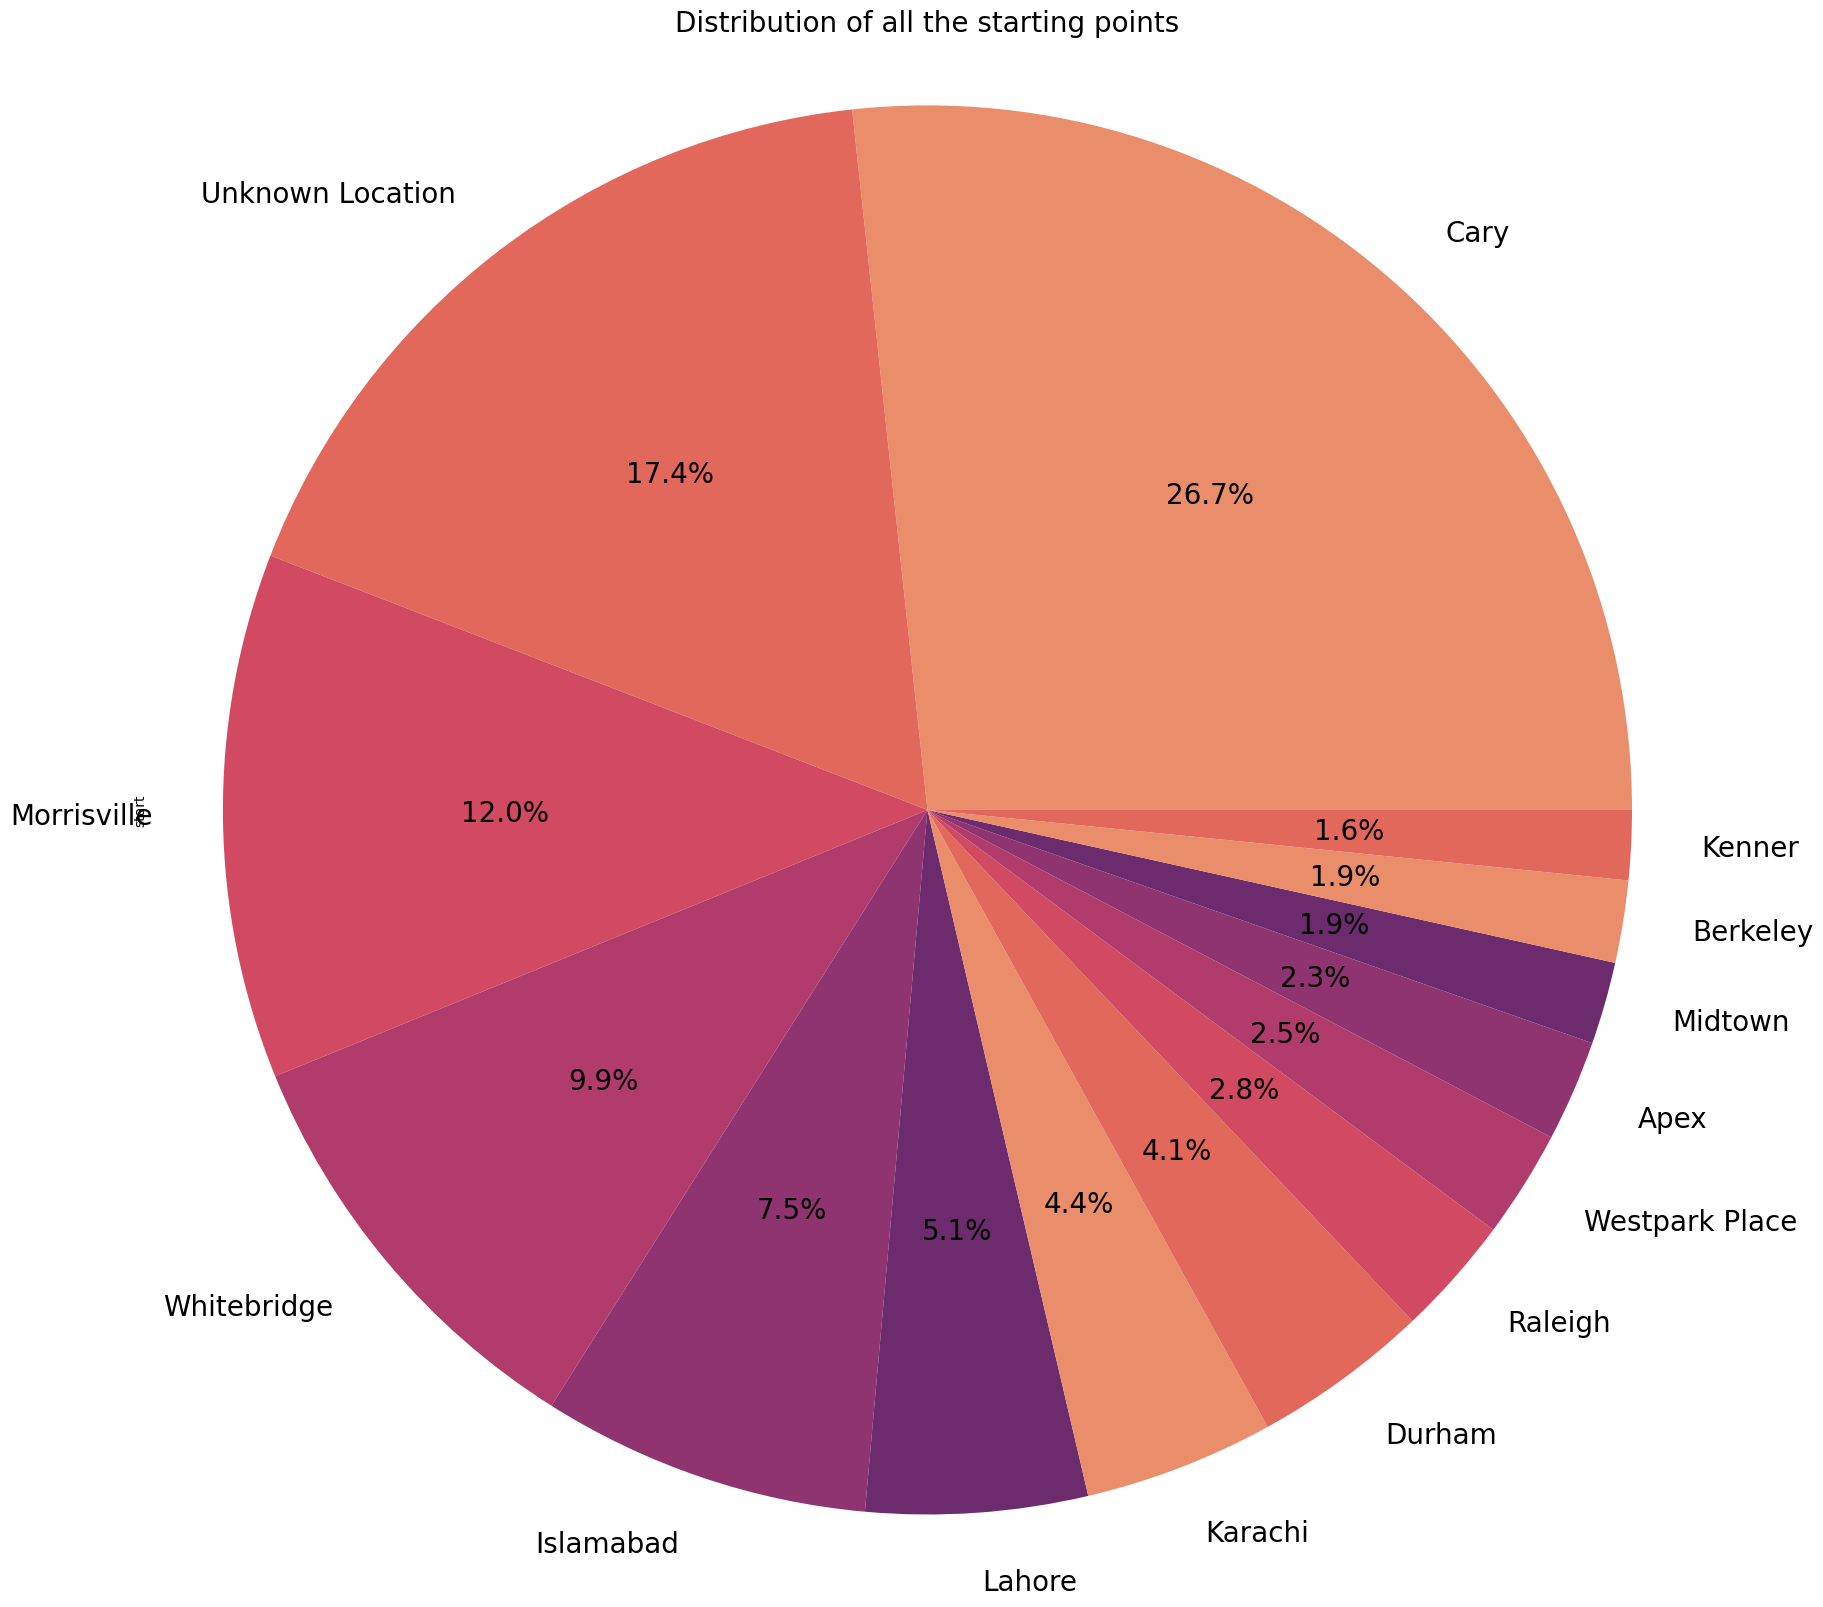

In [34]:
start_point = (df['start'].value_counts() / len(df['start'])) * 100

# Filter values less than 10
filtered_start_point = start_point[start_point > 1]

plt.figure(figsize=(20, 20))
# Plotting the pie chart with labels and values
filtered_start_point.plot(kind='pie', colors=sns.color_palette('flare'), 
                          autopct='%1.1f%%', labels=filtered_start_point.index,fontsize=20)
plt.axis('equal')
plt.title('Distribution of all the starting points',fontsize=20)
plt.show()

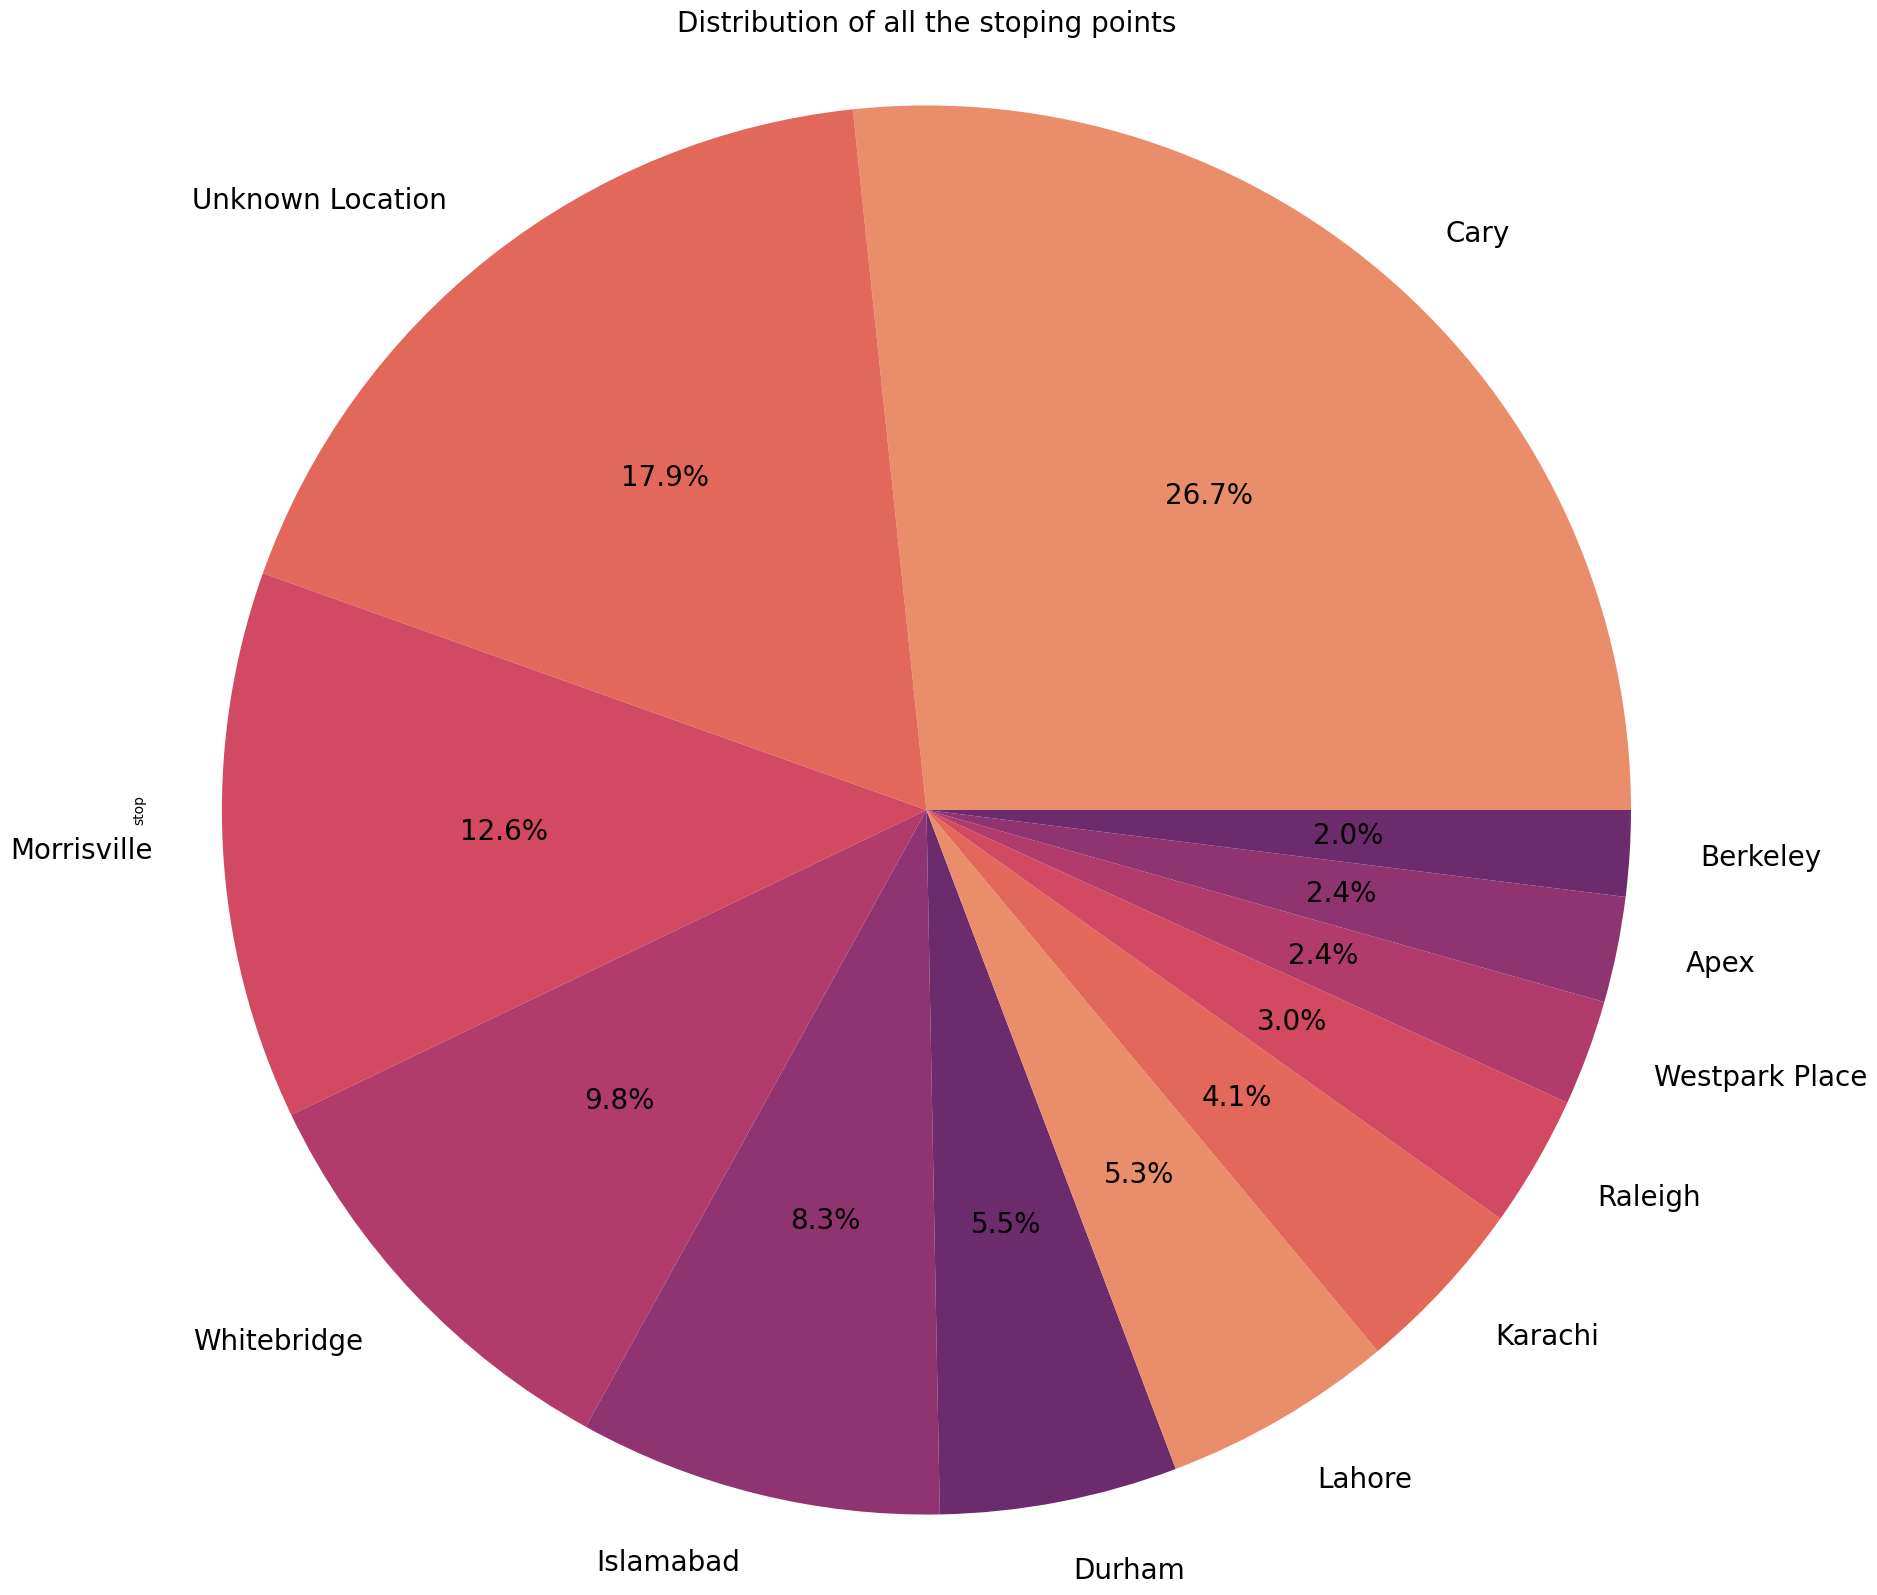

In [35]:
stop_point = (df['stop'].value_counts() / len(df['stop'])) * 100

# Filter values less than 10
filtered_stop_point = stop_point[stop_point > 1]

plt.figure(figsize=(20, 20))
# Plotting the pie chart with labels and values
filtered_stop_point.plot(kind='pie', colors=sns.color_palette('flare'), autopct='%1.1f%%', labels=filtered_stop_point.index,fontsize=20)
plt.axis('equal')
plt.title('Distribution of all the stoping points',fontsize=20)
plt.show()

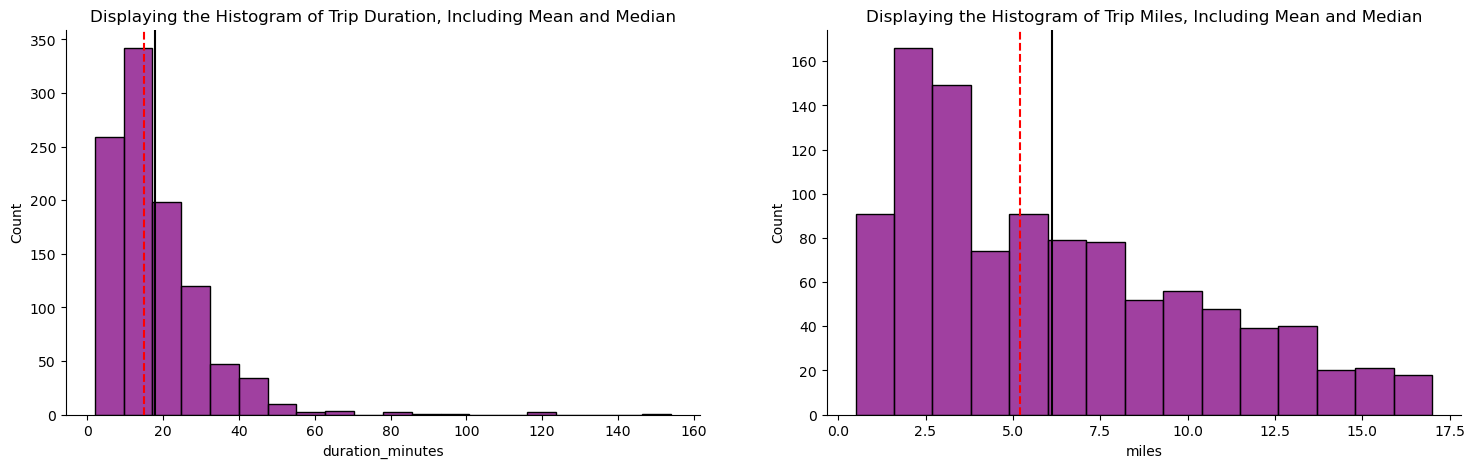

In [36]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.histplot(x=df.duration_minutes,color='purple',bins=20)
plt.axvline(df.duration_minutes.mean(), color='black', linestyle='-', label=f'Mean:')
plt.axvline(df.duration_minutes.median(), color='red', linestyle='--', label=f'Median:')
plt.title("Displaying the Histogram of Trip Duration, Including Mean and Median")

plt.subplot(1,2,2)
sns.histplot(x=df.miles,color='purple',bins=15)
plt.axvline(df.miles.mean(), color='black', linestyle='-', label=f'Mean:')
plt.axvline(df.miles.median(), color='red', linestyle='--', label=f'Median:')
plt.title("Displaying the Histogram of Trip Miles, Including Mean and Median")
sns.despine()
plt.show()

### **_`OBSERVATIONS / INSIGHTS:`_**

**A.Miles:**
- The mean distance covered in miles is approximately 6.11 miles, with a standard deviation of around 4.13 miles. This indicates that the average trip distance varies moderately around the mean.
- The median distance, which represents the middle value of the dataset when arranged in ascending order, is 5.2 miles. This suggests that the distribution of trip distances is slightly skewed towards shorter trips, as the median is lower than the mean.

**B. Duration Minutes:**

- The mean duration of trips in minutes is approximately 18 minutes, with a standard deviation of around 13.15 minutes. This indicates that the average trip duration varies considerably around the mean.
- The median duration, which represents the middle value of the dataset when arranged in ascending order, is 15 minutes. Similar to miles, this suggests that the distribution of trip durations is slightly skewed towards shorter durations, as the median is lower than the mean.

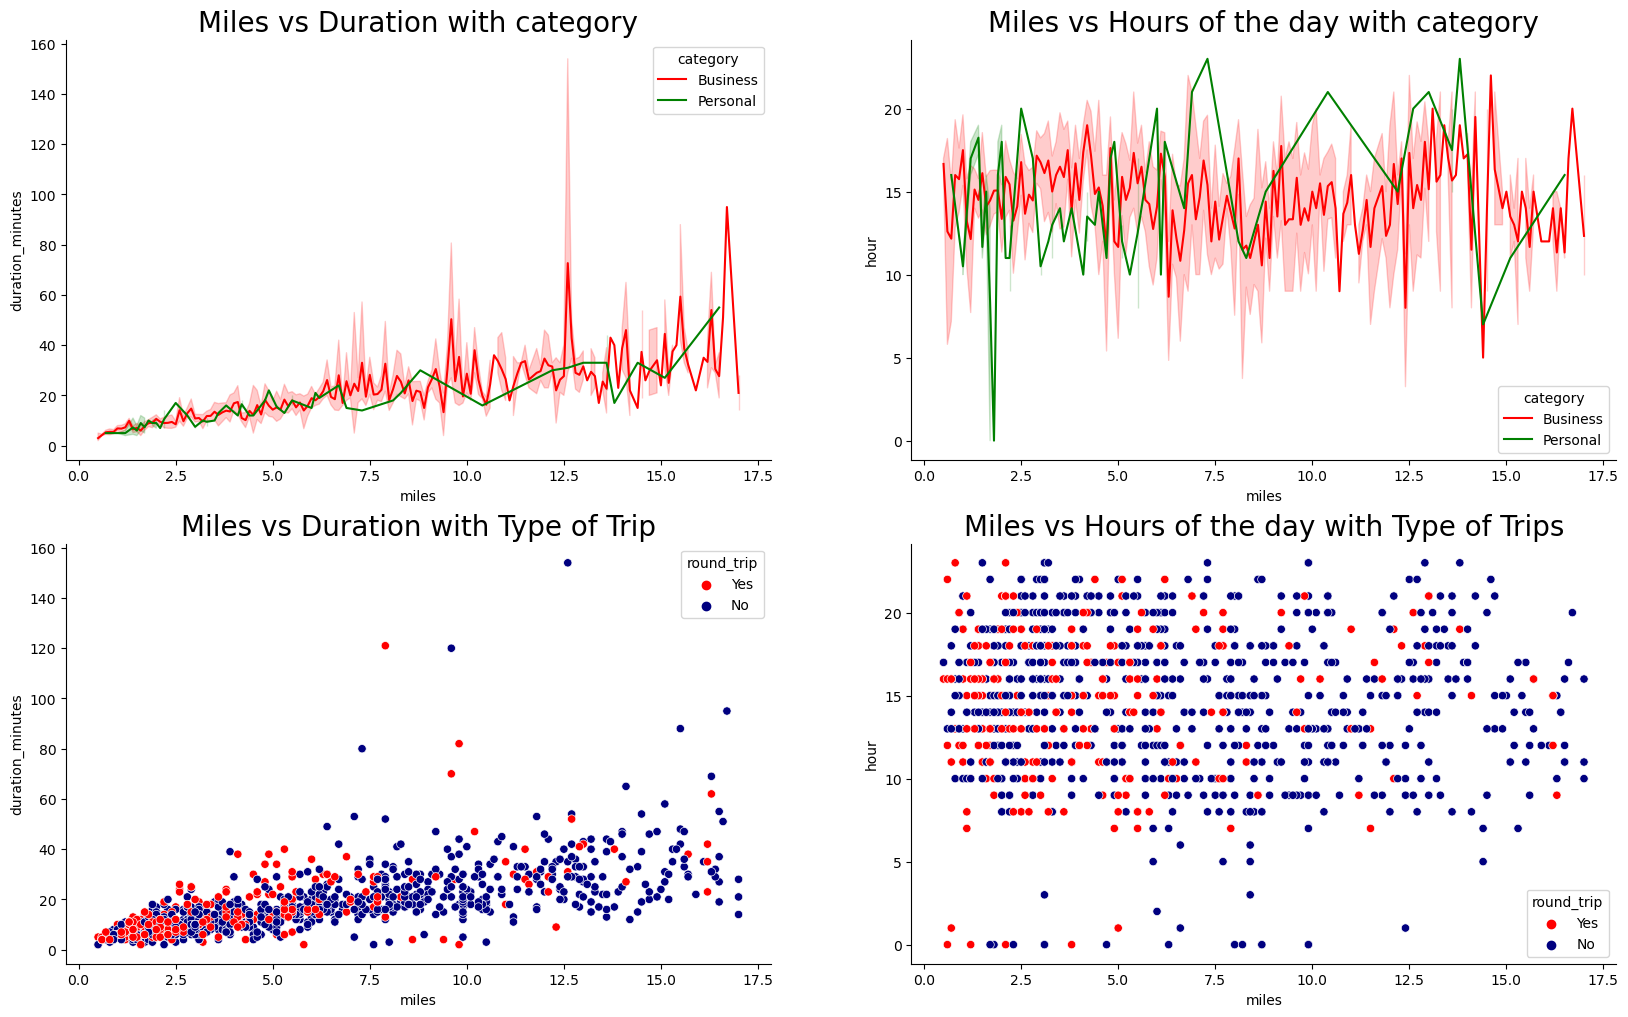

In [37]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(x=df.miles,y=df.duration_minutes,hue=df['category'],palette=['red','green'])
plt.title("Miles vs Duration with category",fontsize=20)
plt.subplot(2,2,2)
sns.lineplot(x=df.miles,y=df.hour,hue=df['category'],palette=['red','green'])
plt.title("Miles vs Hours of the day with category",fontsize=20)
plt.subplot(2,2,3)
sns.scatterplot(x=df.miles,y=df.duration_minutes,hue=df['round_trip'],palette=['red','navy'])
plt.title("Miles vs Duration with Type of Trip",fontsize=20)
plt.subplot(2,2,4)
sns.scatterplot(x=df.miles,y=df.hour,hue=df['round_trip'],palette=['red','navy'])
plt.title("Miles vs Hours of the day with Type of Trips",fontsize=20)
sns.despine()
plt.show()

### **_`OBSERVATIONS / INSIGHTS:`_**

**A. Lineplots:**

- There is an upward trend in the relationship between miles and duration, indicating that longer distances generally result in longer trip durations.
- The dominance of the Business category in the dataset is reflected in the lineplot, where Business trips tend to have longer durations compared to Personal trips.
- The analysis of miles versus hour does not show significant fluctuations for Business trips, whereas Personal trips exhibit more variability in duration across different hours.

**B. Scatterplots:**

- The positive correlation (0.65 in the heatmap) between miles and durations is evident in the scatterplot, showing that trips with longer distances tend to have longer durations.
- Round trips, represented by shorter distances, generally have shorter durations compared to single trips that cover a wider range of distances and durations.

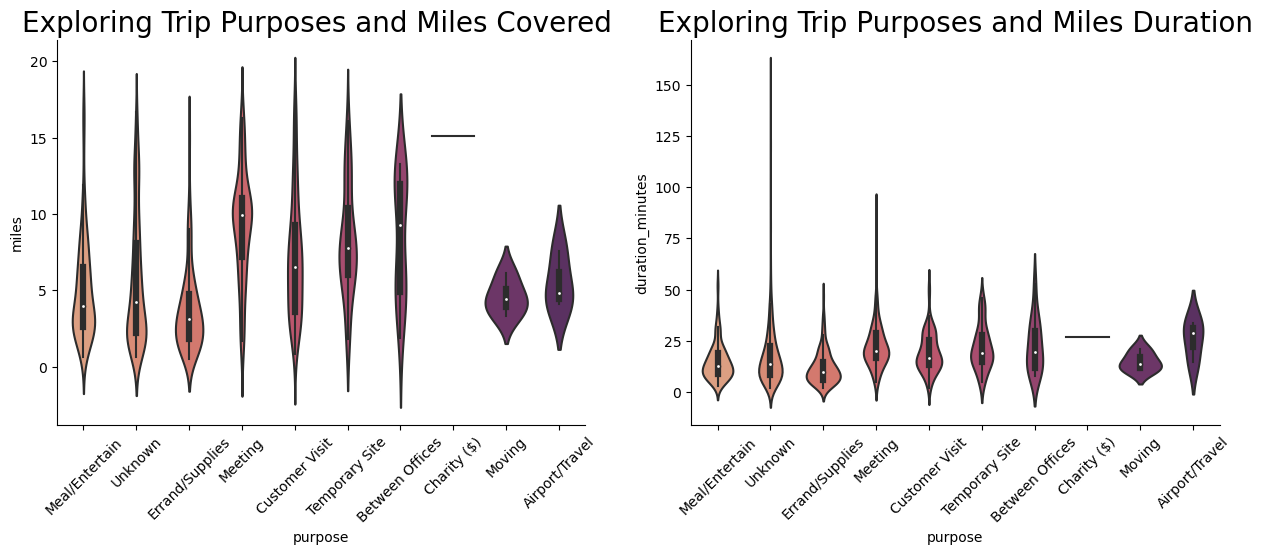

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(y=df.miles,x=df.purpose,palette='flare')
plt.title("Exploring Trip Purposes and Miles Covered ",fontsize=20)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.violinplot(y=df.duration_minutes,x=df.purpose,palette='flare')
plt.title("Exploring Trip Purposes and Miles Duration",fontsize=20)
plt.xticks(rotation=45)
sns.despine()
plt.show()

### **_`OBSERVATIONS / INSIGHTS:`_**

**A. Airport/Travel:**

Trips for Airport/Travel purposes have a relatively consistent median distance, indicating that these trips are typically of similar lengths.

**B.Between Offices:** 

Between Offices trips show a significantly higher median distance compared to other purposes, suggesting that these trips often involve longer distances between office locations.

**C.Charity ($):**

The Charity trips category has a high median distance, indicating that these trips tend to cover substantial distances, likely related to charitable activities or events.

**D.Customer Visit:**

Trips for Customer Visits have a moderate median distance, suggesting that these trips are typically of moderate length when visiting customers.

**E.Errand/Supplies:**

Errand/Supplies trips have a relatively low median distance, indicating that these trips are often short and may involve nearby locations for errands or supply runs.

**F.Meal/Entertain:**

Trips for Meal/Entertainment purposes have a moderate median distance, suggesting that these trips cover a moderate distance for dining or entertainment activities.

**G.Meeting:**

Meeting trips exhibit a high median distance, indicating that these trips typically involve longer distances for business or professional meetings.

**H.Moving:**

Moving trips have a moderate median distance, suggesting that these trips cover a moderate distance when moving from one location to another.

**I.Temporary Site:**

Trips to Temporary Sites have a moderate median distance, indicating that these trips typically cover a moderate distance for temporary work or assignments.

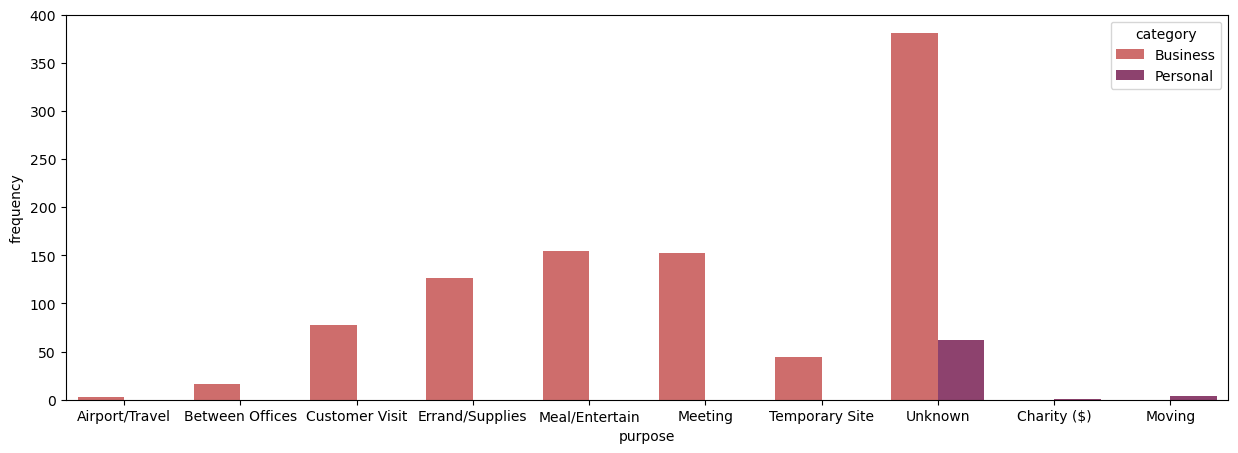

In [39]:
grouped_counts = df.groupby(['category', 'purpose']).size().reset_index(name='frequency')
plt.figure(figsize=(15,5))
sns.barplot(x=grouped_counts.purpose,y=grouped_counts.frequency,hue=grouped_counts.category,palette='flare')
plt.show()

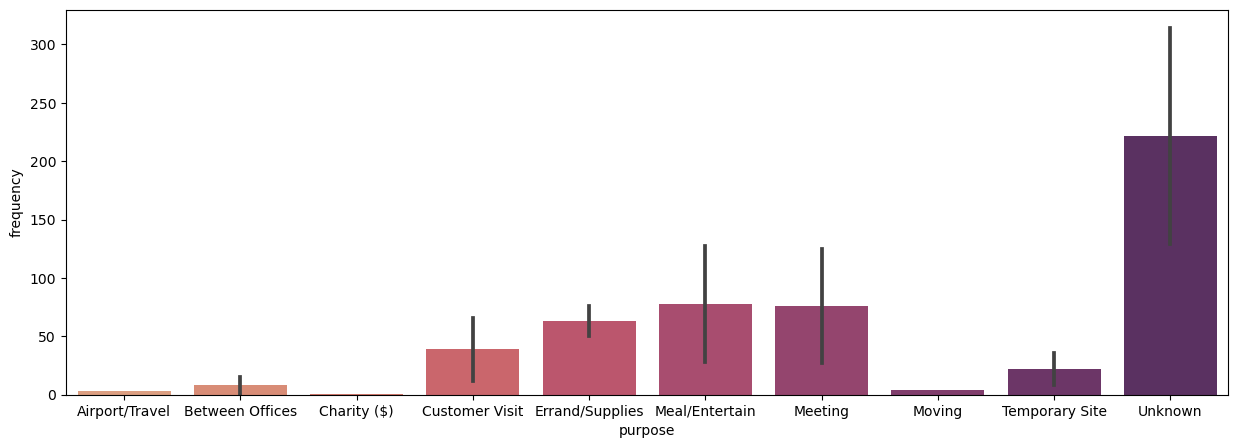

In [40]:
group_trips = df.groupby(['purpose','round_trip']).size().reset_index(name='frequency')
plt.figure(figsize=(15,5))
sns.barplot(x=group_trips.purpose,y=group_trips.frequency,palette='flare')
plt.show()

<Figure size 1500x500 with 0 Axes>

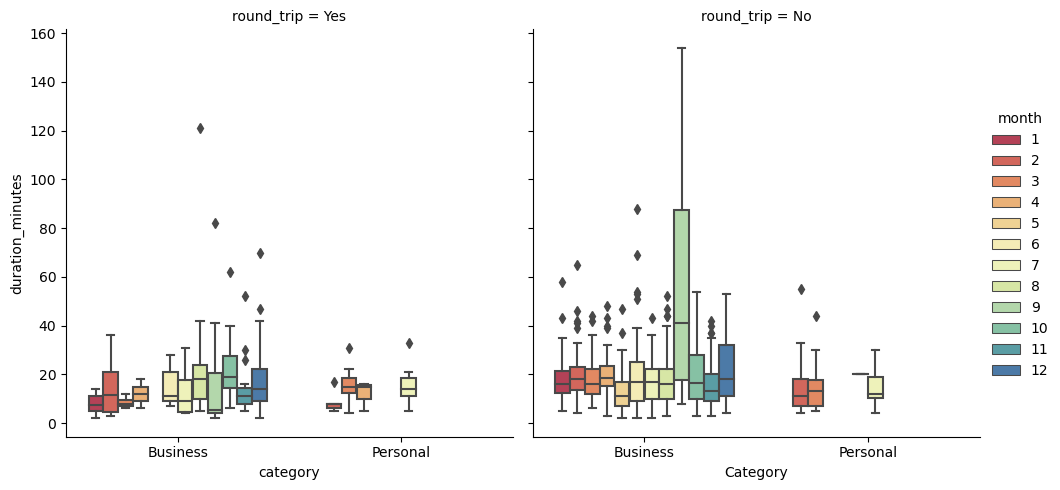

In [41]:
plt.figure(figsize=(15,5))
sns.catplot(x='category', y='duration_minutes', hue='month', col='round_trip',
            data=df, kind='box',palette='Spectral')

# Set the title and labels
# plt.title("Categorical Plot: Category vs. Duration (Categorized by Month)")
plt.xlabel("Category")
plt.ylabel("Duration (Minutes)")

plt.show()

### **_`OBSERVATIONS / INSIGHTS:`_**

- There were no Business round trips recorded during June.
- Personal round trips occurred for only 4 months and were relatively shorter in duration.
- September witnessed the highest number of Business rides without round trips, while other months had consistent average rides. In contrast, Personal rides without round trips were observed mainly in January, February, and June.

<Figure size 1500x400 with 0 Axes>

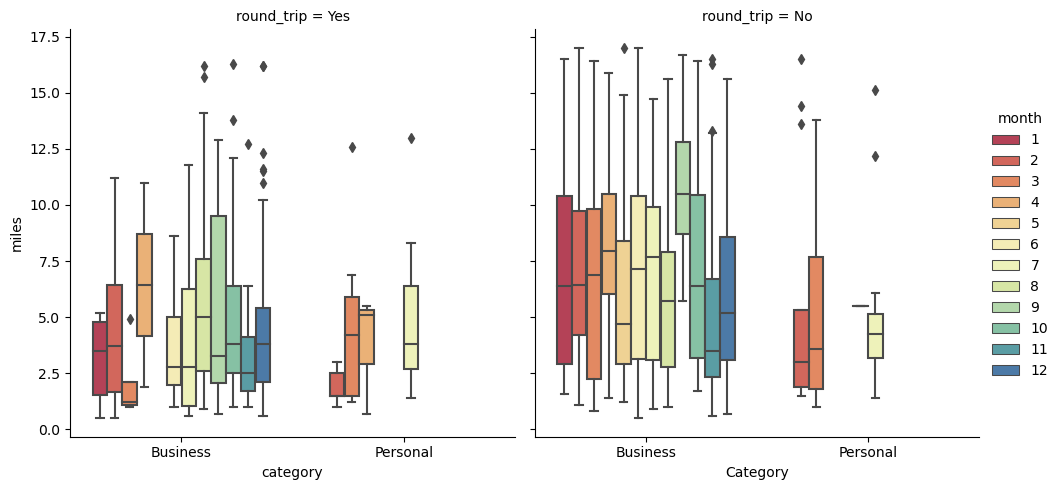

In [42]:
plt.figure(figsize=(15,4))
sns.catplot(x='category', y='miles', hue='month', col='round_trip',
            data=df, kind='box',palette='Spectral',)

# Set the title and labels
# plt.title("Categorical Plot: Category vs. Duration (Categorized by Month)")
plt.xlabel("Category")
plt.ylabel("Duration (Minutes)")

plt.show()

### **_`OBSERVATIONS / INSIGHTS:`_**

- Business rides (round trips) indicate that the most distance was covered during the third and fourth quarters of the year, while Personal rides (round trips) typically cover average distances, primarily observed in January, February, March, and June.
- Business rides (not round trips) cover distances ranging from the minimum to almost the maximum for nearly every month, whereas Personal rides (not round trips) cover moderate distances, especially noticeable in January, February, and June.

<Figure size 1500x400 with 0 Axes>

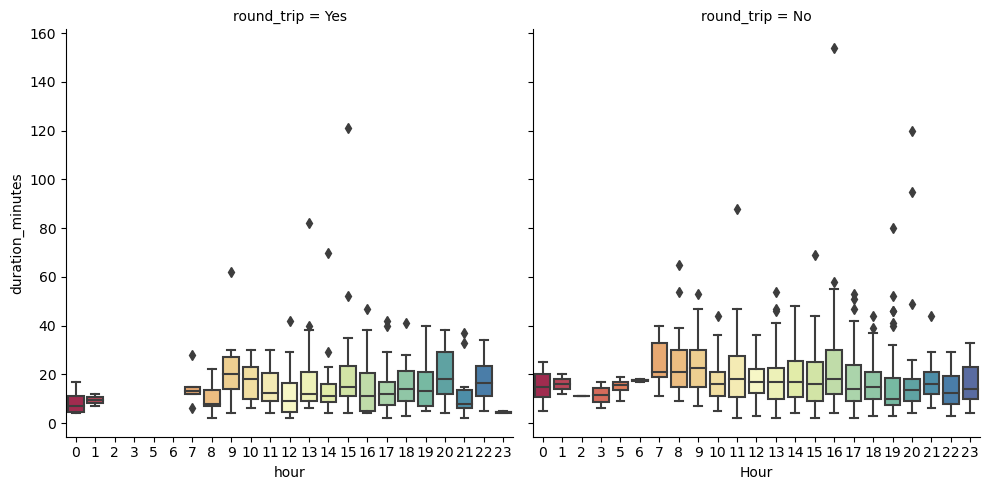

In [43]:
plt.figure(figsize=(15,4))
sns.catplot(x='hour', y='duration_minutes', col='round_trip',
            data=df, kind='box', palette='Spectral')

# Set the title and labels
# plt.title("Categorical Plot: Hour vs. Duration (Categorized by Round Trip)")
plt.xlabel("Hour")
plt.ylabel("Duration (Minutes)")

plt.show()

<Figure size 1500x400 with 0 Axes>

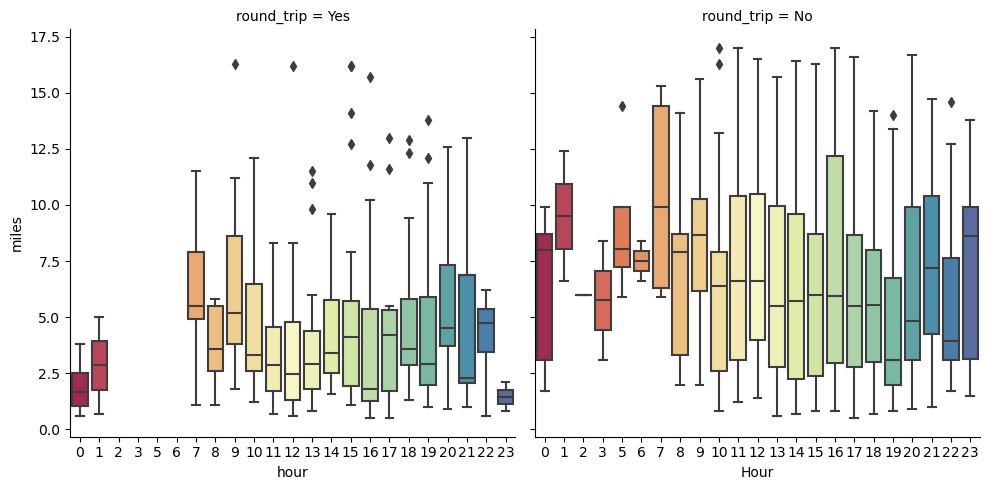

In [44]:
plt.figure(figsize=(15,4))
sns.catplot(x='hour', y='miles', col='round_trip',
            data=df, kind='box', palette='Spectral')

# Set the title and labels
# plt.title("Categorical Plot: Hour vs. Miles (Categorized by Round Trip)")
plt.xlabel("Hour")
plt.ylabel("Miles")

plt.show()

# `NON-GRAPHICAL REPRESENTATION`

In [45]:
df.groupby('purpose')['miles'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
Airport/Travel,3.0,5.500000,1.852026,4.1,4.450,4.8,6.200,7.6
Between Offices,16.0,8.581250,3.977976,1.9,4.875,9.3,11.975,13.3
Charity ($),1.0,15.100000,NaN,15.1,15.100,15.1,15.100,15.1
Customer Visit,78.0,7.183333,3.893765,0.8,3.575,6.5,9.275,17.0
Errand/Supplies,126.0,3.707937,2.783799,0.5,1.800,3.1,4.775,15.6
Meal/Entertain,155.0,5.035484,3.249191,0.6,2.600,4.0,6.500,17.0
Meeting,152.0,9.220395,3.609541,0.7,7.175,9.9,11.025,17.0
Moving,4.0,4.550000,1.181807,3.3,3.900,4.4,5.050,6.1
Temporary Site,44.0,8.250000,3.604422,1.8,5.975,7.8,10.375,16.1


In [46]:
df.groupby('purpose')['duration_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
Airport/Travel,3.0,26.000000,9.848858,15.0,22.00,29.0,31.50,34.0
Between Offices,16.0,22.937500,12.766982,8.0,12.00,19.5,30.00,53.0
Charity ($),1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
Customer Visit,78.0,19.538462,9.448002,2.0,13.25,17.0,25.75,52.0
Errand/Supplies,126.0,12.317460,8.162010,2.0,6.00,10.0,15.00,47.0
Meal/Entertain,155.0,15.232258,9.077458,3.0,9.00,13.0,19.00,53.0
Meeting,152.0,23.151316,11.960066,5.0,17.00,20.0,29.00,88.0
Moving,4.0,15.000000,4.546061,11.0,11.75,14.0,17.25,21.0
Temporary Site,44.0,21.977273,10.641054,5.0,15.00,19.0,28.00,46.0


In [47]:
df.groupby('round_trip')['duration_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
round_trip,,,,,,,,
No,764.0,18.615183,13.038549,2.0,10.0,16.0,23.0,154.0
Yes,258.0,16.170543,13.333568,2.0,8.0,13.0,21.0,121.0


In [48]:
df.groupby('round_trip')['miles'].describe()

,count,mean,std,min,25%,50%,75%,max
round_trip,,,,,,,,
No,764.0,6.668979,4.183913,0.5,3.000,6.05,9.9,17.0
Yes,258.0,4.470930,3.479351,0.5,1.825,3.50,5.5,16.3


In [49]:
df.groupby('month')['miles'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,55.0,6.041818,4.360585,0.5,2.150,5.00,8.150,16.5
2,102.0,6.239216,4.110603,0.5,2.600,5.75,8.725,17.0
3,99.0,6.022222,4.354063,0.8,2.000,5.90,9.000,16.4
4,43.0,8.051163,4.077719,0.7,5.500,7.70,10.450,15.9
5,45.0,6.382222,4.342721,1.2,2.900,4.70,8.400,17.0
6,98.0,6.784694,4.309982,0.5,2.850,6.00,9.900,17.0
7,102.0,6.675490,4.143668,0.6,3.025,6.10,9.900,15.1
8,117.0,5.835043,3.733846,0.9,2.700,5.30,7.700,16.2
9,27.0,7.614815,4.791475,0.7,2.850,8.60,10.550,16.7


In [50]:
df.groupby('month')['duration_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,55.0,15.690909,10.255753,2.0,8.0,14.0,20.0,58.0
2,102.0,17.549020,11.379700,3.0,9.0,16.0,22.0,65.0
3,99.0,16.484848,8.833336,4.0,10.0,15.0,21.0,44.0
4,43.0,19.465116,9.835187,3.0,15.0,18.0,22.0,48.0
5,45.0,13.666667,9.804915,2.0,7.0,11.0,17.0,47.0
6,98.0,18.867347,13.725315,2.0,9.0,17.0,25.0,88.0
7,102.0,16.470588,8.287777,2.0,10.0,16.0,21.0,43.0
8,117.0,18.991453,14.060519,3.0,10.0,16.0,23.0,121.0
9,27.0,33.222222,39.780487,2.0,5.0,17.0,41.0,154.0


In [51]:
df.groupby('category')['duration_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Business,955.0,18.226178,13.334165,2.0,10.0,15.0,23.0,154.0
Personal,67.0,14.746269,9.673994,4.0,7.5,13.0,18.0,55.0


In [52]:
df.groupby('category')['miles'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Business,955.0,6.193822,4.117414,0.5,2.70,5.3,9.00,17.0
Personal,67.0,4.977612,4.144358,0.7,1.75,3.6,6.15,16.5


# `CONCLUSION:`

- Consider adjusting fare charges to be slightly higher during low hours, from midnight to 12 PM, as peak hours from 12 PM to midnight experience a higher volume of rides.
- The Business rides category is predominant, covering longer distances and durations. Implementing schemes to enhance the profitability of these trips could be beneficial.
- For trips where the start and end points are the same (25% of trips), charges should include waiting time if applicable.